## 1. Image Visualization

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

names = glob('giro_dataset/*.png')
print(len(names))

600


Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)


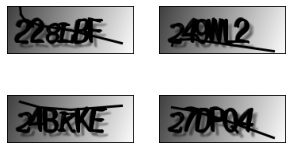

In [2]:
def draw_images(names): # names = paths
    _,ax = plt.subplots(2,2, figsize=(5,3))
    for i in range(4):
        img = cv2.imread(str(names[i]))
        print("Shape of image: ", img.shape)
        ax[i//2, i%2].imshow(img)
        ax[i//2, i%2].axis('off')
    plt.show()
    
def draw_image_file(imgs): # imgs list
    _,ax = plt.subplots(2,2, figsize=(5,3))
    for img in imgs:
        print("Shape of image: ", img.shape)
        ax[i//2, i%2].imshow(img)
        ax[i//2, i%2].axis('off')
    plt.show()
    
draw_images(names)

## 2. Image Binarization
- 이미지 이진화 (Threshold = 20)

완료
0 전처리 100 전처리 200 전처리 300 전처리 400 전처리 500 전처리 데이터 전처리 완료
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)


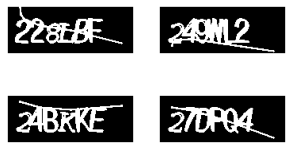

In [3]:
# dir 확인 및 없으면 재생성
biniary_dir_name = 'binarization_inv/'

if not os.path.exists(biniary_dir_name):
    os.mkdir(biniary_dir_name)
    print('완료')
    
# 실험에 의한 Custom 임계값
threshold = 20 
threshold_path = []

for i, path in enumerate(names):
    img = cv2.imread(str(path))
    f_name = names[i].split('\\')[1]
    _, th1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)
    threshold_path.append(biniary_dir_name+f_name)
    
    cv2.imwrite(biniary_dir_name+ f_name, th1)
    if i%100==0:
        print(i, '전처리', end=' ')
print('데이터 전처리 완료')

draw_images(threshold_path[:4])

## 3-1. Morphology
- 침식연산

완료
0 전처리 100 전처리 200 전처리 300 전처리 400 전처리 500 전처리 데이터 전처리 완료
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)


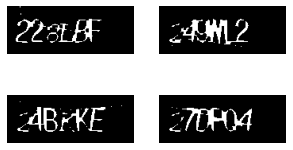

In [4]:
# dir 확인 및 없으면 재생성
biniary_erode_dir_name = 'binarization_inv_erode/'

if not os.path.exists(biniary_erode_dir_name):
    os.mkdir(biniary_erode_dir_name)
    print('완료')
    
erode_path = []
for i, path in enumerate(threshold_path):
    img = cv2.imread(str(path))
    f_name = threshold_path[i].split('/')[1]
    kernel = np.ones((3, 3), np.uint8)
    result = cv2.erode(img, kernel, iterations = 1)
    erode_path.append(biniary_erode_dir_name+f_name)

    cv2.imwrite(biniary_erode_dir_name + f_name, result)
    if i%100==0:
        print(i, '전처리', end=' ')
print('데이터 전처리 완료')

draw_images(erode_path[:4])

## 3-2. Morphology
- Open 연산 (침식 후 , 팽창)

완료
0 전처리 100 전처리 200 전처리 300 전처리 400 전처리 500 전처리 데이터 전처리 완료
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)
Shape of image:  (60, 160, 3)


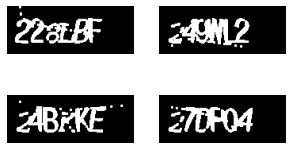

In [5]:
# dir 확인 및 없으면 재생성
biniary_open_dir_name = 'binarization_inv_open/'

if not os.path.exists(biniary_open_dir_name):
    os.mkdir(biniary_open_dir_name)
    print('완료')
    
open_path = []
for i, path in enumerate(threshold_path):
    img = cv2.imread(str(path))
    f_name = threshold_path[i].split('/')[1]
    kernel = np.ones((3, 3), np.uint8)
    result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    open_path.append(biniary_open_dir_name+f_name)

    cv2.imwrite(biniary_open_dir_name + f_name, result)
    if i%100==0:
        print(i, '전처리', end=' ')
print('데이터 전처리 완료')

draw_images(open_path[:4])